<a href="https://colab.research.google.com/github/dickyoktavian1010-dot/UTS_CITRA1/blob/main/UTS%20PCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving photo-1568304205232-59d9e9ac5662.jpg to photo-1568304205232-59d9e9ac5662.jpg


/tmp/ipython-input-3158239599.py:24: RuntimeWarning: overflow encountered in scalar add
  c = 255 / np.log(1 + np.max(img))
/tmp/ipython-input-3158239599.py:24: RuntimeWarning: divide by zero encountered in log
  c = 255 / np.log(1 + np.max(img))
/tmp/ipython-input-3158239599.py:25: RuntimeWarning: divide by zero encountered in log
  log_img = c * np.log(1 + img)
/tmp/ipython-input-3158239599.py:25: RuntimeWarning: invalid value encountered in multiply
  log_img = c * np.log(1 + img)
/tmp/ipython-input-3158239599.py:26: RuntimeWarning: invalid value encountered in cast
  log_img = np.array(log_img, dtype=np.uint8)


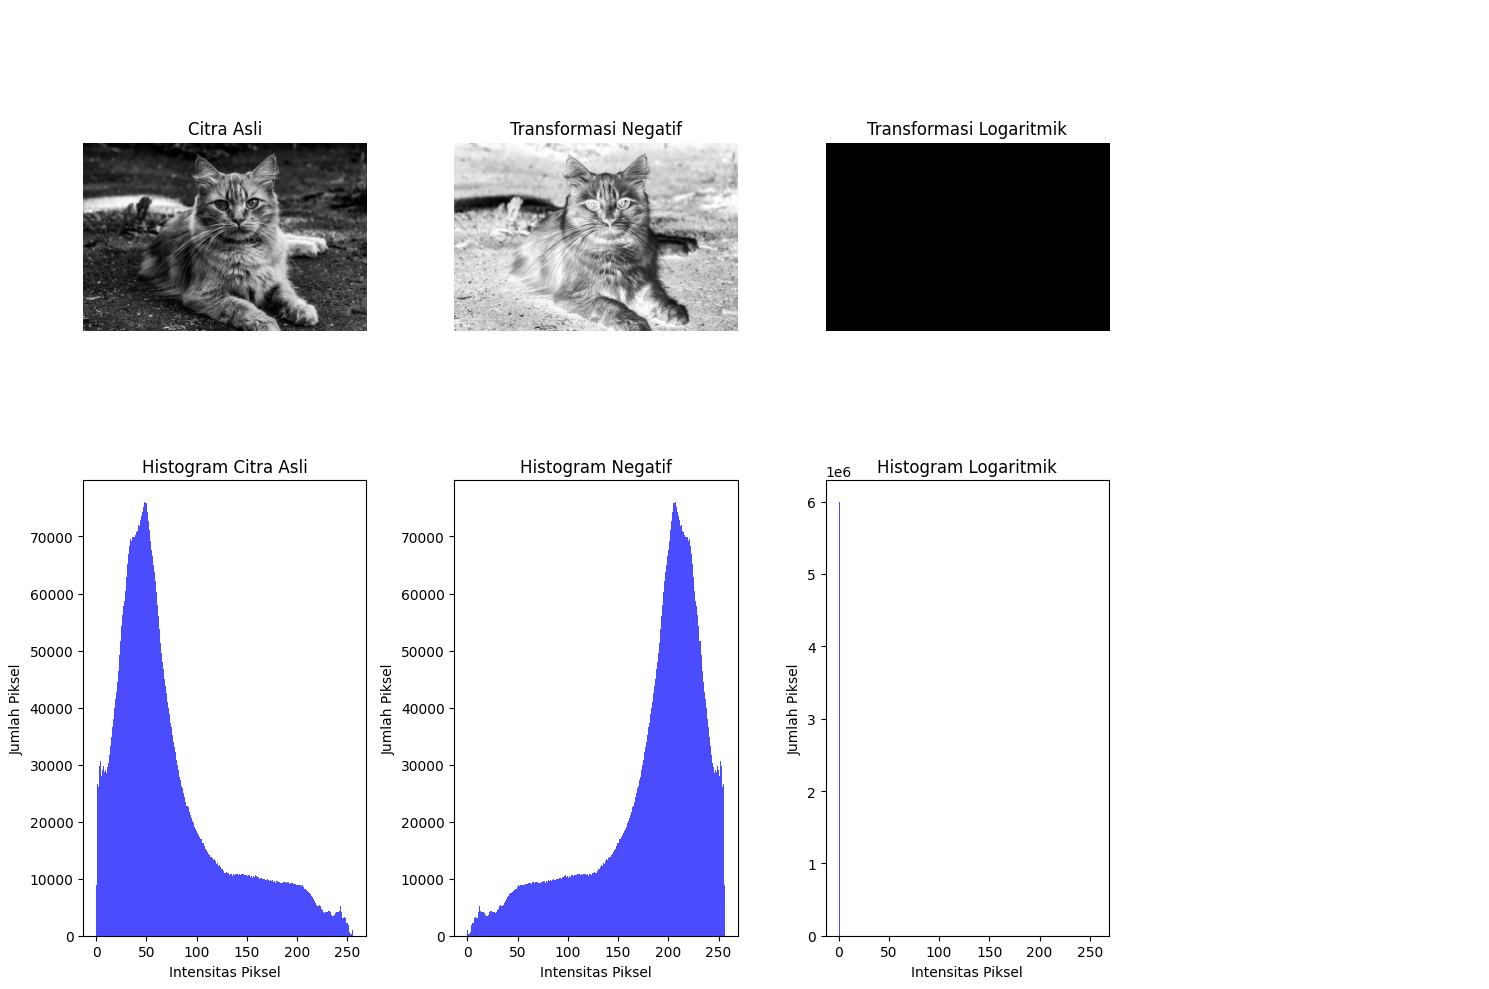

In [1]:
# Import library
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Upload gambar
from google.colab import files
uploaded = files.upload()

# Membaca gambar grayscale
img = cv2.imread(list(uploaded.keys())[0], cv2.IMREAD_GRAYSCALE)

# -------------------------------
# 1. Transformasi Negatif
# Rumus: G = 255 - F
# -------------------------------
negatif_img = 255 - img

# -------------------------------
# 2. Transformasi Logaritmik
# Rumus: G = c * log(1 + F)
# dengan c = 255 / log(1 + max(F))
# -------------------------------
c = 255 / np.log(1 + np.max(img))
log_img = c * np.log(1 + img)
log_img = np.array(log_img, dtype=np.uint8)

# -------------------------------
# Fungsi untuk menampilkan histogram
# -------------------------------
def plot_histogram(image, title):
    plt.hist(image.ravel(), bins=256, range=(0,256), color='blue', alpha=0.7)
    plt.title(title)
    plt.xlabel('Intensitas Piksel')
    plt.ylabel('Jumlah Piksel')

# -------------------------------
# Visualisasi hasil
# -------------------------------
plt.figure(figsize=(15,10))

# Citra Asli
plt.subplot(2,4,1)
plt.title("Citra Asli")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(2,4,5)
plot_histogram(img, "Histogram Citra Asli")

# Citra Negatif
plt.subplot(2,4,2)
plt.title("Transformasi Negatif")
plt.imshow(negatif_img, cmap='gray')
plt.axis('off')

plt.subplot(2,4,6)
plot_histogram(negatif_img, "Histogram Negatif")

# Citra Logaritmik
plt.subplot(2,4,3)
plt.title("Transformasi Logaritmik")
plt.imshow(log_img, cmap='gray')
plt.axis('off')

plt.subplot(2,4,7)
plot_histogram(log_img, "Histogram Logaritmik")

# Kosongkan subplot terakhir untuk estetika
plt.subplot(2,4,4)
plt.axis('off')

plt.tight_layout()
plt.show()


Saving photo-1568304205232-59d9e9ac5662.jpg to photo-1568304205232-59d9e9ac5662 (1).jpg
Nilai rata-rata piksel:
Original : 73.36
LPF      : 73.37
HPF      : 14.60
BPF      : 73.53


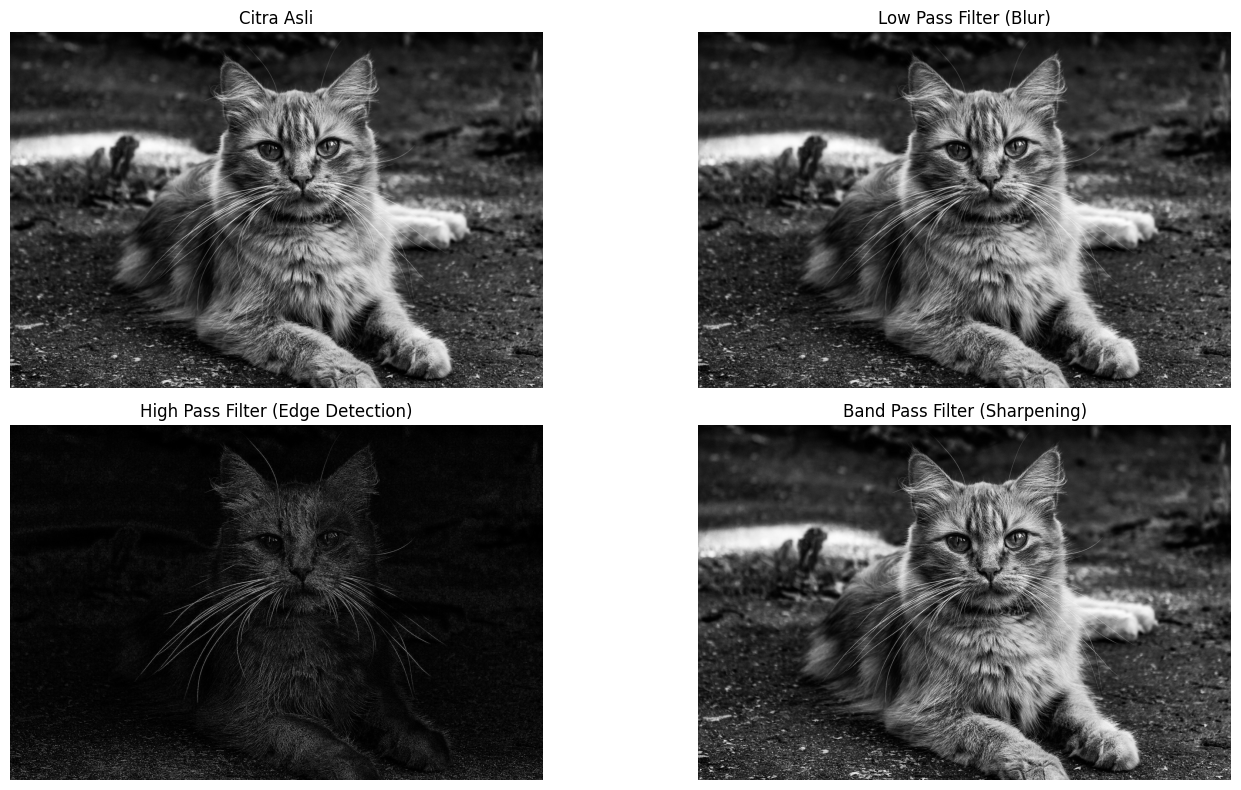

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload gambar
uploaded = files.upload()
img = cv2.imread(list(uploaded.keys())[0], cv2.IMREAD_GRAYSCALE)

# -------------------------------
# Definisi Kernel
# -------------------------------
LPF_kernel = (1/9) * np.array([[1,1,1],
                               [1,1,1],
                               [1,1,1]])

HPF_kernel = np.array([[-1,-1,-1],
                       [-1, 8,-1],
                       [-1,-1,-1]])

BPF_kernel = np.array([[ 0,-1, 0],
                       [-1, 5,-1],
                       [ 0,-1, 0]])

# -------------------------------
# Konvolusi dengan filter
# -------------------------------
LPF_img = cv2.filter2D(img, -1, LPF_kernel)
HPF_img = cv2.filter2D(img, -1, HPF_kernel)
BPF_img = cv2.filter2D(img, -1, BPF_kernel)

# -------------------------------
# Hitung nilai rata-rata piksel
# -------------------------------
mean_original = np.mean(img)
mean_LPF = np.mean(LPF_img)
mean_HPF = np.mean(HPF_img)
mean_BPF = np.mean(BPF_img)

print("Nilai rata-rata piksel:")
print(f"Original : {mean_original:.2f}")
print(f"LPF      : {mean_LPF:.2f}")
print(f"HPF      : {mean_HPF:.2f}")
print(f"BPF      : {mean_BPF:.2f}")

# -------------------------------
# Visualisasi hasil
# -------------------------------
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
plt.title("Citra Asli")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(2,2,2)
plt.title("Low Pass Filter (Blur)")
plt.imshow(LPF_img, cmap='gray')
plt.axis('off')

plt.subplot(2,2,3)
plt.title("High Pass Filter (Edge Detection)")
plt.imshow(HPF_img, cmap='gray')
plt.axis('off')

plt.subplot(2,2,4)
plt.title("Band Pass Filter (Sharpening)")
plt.imshow(BPF_img, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


Citra Asli

Histogram menunjukkan distribusi intensitas sesuai kondisi gambar input.

Jika gambar banyak area gelap, histogram akan terkonsentrasi di nilai rendah (0–100).

Jika banyak area terang, histogram bergeser ke nilai tinggi (150–255).

Citra Negatif (G = 255 − F)

Histogram hasil negatif adalah cerminan dari histogram asli terhadap sumbu tengah (nilai 127.5).

Piksel gelap (nilai rendah) berubah menjadi terang (nilai tinggi), dan sebaliknya.

Distribusi intensitas tetap sama bentuknya, hanya dibalik posisinya. Jadi pola histogram asli dipantulkan ke arah kanan.

Citra Logaritmik (G = c × log(1 + F))

Histogram bergeser sehingga nilai rendah (gelap) diperluas rentangnya.

Piksel gelap menjadi lebih terang, sehingga detail di area gelap lebih terlihat.

Nilai tinggi (terang) mengalami kompresi, sehingga perbedaan antar piksel terang tidak terlalu besar.

Histogram cenderung lebih merata di rentang menengah, karena logaritma memperkuat intensitas rendah dan menekan intensitas tinggi.

 Kapan Transformasi Logaritmik Lebih Bermanfaat?
Transformasi Negatif berguna ketika:

Ingin membalikkan kontras (misalnya untuk analisis medis: citra rontgen, di mana struktur lebih jelas jika dibalik).

Membutuhkan representasi kebalikan dari citra asli.

Transformasi Logaritmik lebih bermanfaat ketika:

Gambar memiliki banyak detail di area gelap (low intensity) yang sulit terlihat.

Digunakan untuk enhancement agar detail tersembunyi di bayangan muncul lebih jelas.

Cocok untuk citra dengan rentang dinamis tinggi (misalnya foto astronomi, citra medis, atau gambar dengan pencahayaan tidak merata).

Karena logaritma menekan nilai tinggi, citra terang tidak terlalu dominan, sehingga distribusi lebih seimbang.

Visual

Original: tampilan asli tanpa perubahan.

LPF (Low Pass Filter): citra menjadi lebih halus, detail kecil dan noise berkurang. Efek blur terlihat jelas.

HPF (High Pass Filter): menonjolkan tepi (edge). Area datar jadi gelap, sedangkan batas kontras jadi terang.

BPF (Band Pass Filter): citra tampak lebih tajam. Detail tepi diperkuat, tetapi tidak sekeras HPF murni.

Nilai rata-rata piksel

LPF: rata-rata mendekati nilai asli, tapi sedikit lebih rendah karena smoothing menurunkan kontras.

HPF: rata-rata biasanya lebih rendah (banyak nilai negatif/gelap), karena hanya menonjolkan tepi.

BPF: rata-rata lebih dekat ke citra asli, karena sharpening mempertahankan detail sekaligus menambah kontras.

 Hubungan Domain Spasial dan Domain Frekuensi
LPF (Low Pass Filter)

Spasial: merata-ratakan piksel tetangga → hasil blur.

Frekuensi: menekan komponen frekuensi tinggi (detail, noise), mempertahankan frekuensi rendah (area halus).

HPF (High Pass Filter)

Spasial: menyorot perbedaan intensitas antar piksel → hasil edge detection.

Frekuensi: menekan frekuensi rendah, mempertahankan frekuensi tinggi (tepi, detail tajam).

BPF (Band Pass Filter)

Spasial: kombinasi smoothing + penajaman → hasil lebih tajam tapi tetap natural.

Frekuensi: melewatkan rentang frekuensi menengah, sehingga detail diperkuat tanpa terlalu banyak noise.